###

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import pandas as pd

df = pd.read_csv('age.csv',encoding='cp949',index_col = 0)

df.head()

,총인구수,연령구간인구수,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9770638,9770638,53738,59599,65815,70726,70037,69000,76377,73745,75639,70189,74217,80273,74774,71529,78329,82561,82083,90416,107254,109552,114315,122473,129497,141673,150625,156258,165662,165771,152776,151006,150177,144503,144300,145260,142644,157624,164934,168159,...,142867,132352,135608,123861,103339,110202,83062,85623,88133,85983,86008,79560,60652,63418,59401,72043,60979,49561,47432,42445,37293,33253,29705,25250,20503,17751,14506,12100,10729,8923,7199,5374,3972,2927,2813,2260,1565,1180,880,5932
서울특별시 종로구 (1111000000),152880,152880,593,683,775,874,852,863,1023,904,1012,923,1004,1151,1084,1005,1099,1180,1171,1338,1528,1767,1899,2122,2193,2454,2438,2572,2682,2598,2446,2234,2206,2161,2060,1949,1888,2149,2116,2219,...,2267,2204,2185,2014,1665,1796,1362,1387,1454,1432,1512,1369,1099,1215,1144,1424,1245,1044,1065,894,763,725,626,572,462,395,336,282,236,199,163,132,112,79,69,81,53,40,39,236
서울특별시 종로구 청운효자동(1111051500),13010,13010,66,79,72,98,98,94,108,109,115,95,125,142,130,105,136,124,134,151,155,147,172,143,181,188,139,163,171,186,151,137,168,157,172,160,162,193,178,232,...,150,138,160,131,132,124,91,103,115,106,119,118,95,103,92,125,94,87,103,83,64,67,62,47,47,31,30,12,21,14,9,8,14,6,7,9,4,2,2,16
서울특별시 종로구 사직동(1111053000),9584,9584,43,50,64,67,67,70,94,65,82,64,88,73,88,70,64,75,77,68,81,96,95,110,93,103,127,120,151,139,137,126,127,169,150,124,120,138,147,146,...,137,139,117,114,106,116,65,91,85,85,95,78,74,80,68,80,82,75,66,68,60,53,60,51,38,26,22,22,20,17,14,5,12,6,5,8,2,5,4,17
서울특별시 종로구 삼청동(1111054000),2820,2820,9,15,3,21,11,13,9,16,14,25,18,27,20,17,19,17,17,27,23,27,25,36,29,35,35,33,37,31,36,42,46,35,35,41,32,42,45,57,...,46,41,51,51,27,45,23,24,36,34,43,31,19,28,23,33,34,25,26,15,18,20,16,14,14,14,10,8,8,4,6,6,1,3,0,3,1,0,2,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3841 entries, 서울특별시  (1100000000) to 제주특별자치도 서귀포시 예래동(5013062000)
Columns: 103 entries, 총인구수 to 2019년02월_계_100세 이상
dtypes: int64(103)
memory usage: 3.0+ MB


In [ ]:
df.shape

(3841, 103)

In [ ]:
import pandas as pd

df = pd.read_csv('age.csv',encoding='cp949',index_col = 0)

df.head()

print(df.head())

                                총인구수  ...  2019년02월_계_100세 이상
행정구역                                  ...                    
서울특별시  (1100000000)          9770638  ...                5932
서울특별시 종로구 (1111000000)        152880  ...                 236
서울특별시 종로구 청운효자동(1111051500)    13010  ...                  16
서울특별시 종로구 사직동(1111053000)       9584  ...                  17
서울특별시 종로구 삼청동(1111054000)       2820  ...                   7

[5 rows x 103 columns]


###인구수 -> 인구비율로 데이터 전처리

In [ ]:
df.head()

,총인구수,연령구간인구수,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9770638,9770638,53738,59599,65815,70726,70037,69000,76377,73745,75639,70189,74217,80273,74774,71529,78329,82561,82083,90416,107254,109552,114315,122473,129497,141673,150625,156258,165662,165771,152776,151006,150177,144503,144300,145260,142644,157624,164934,168159,...,142867,132352,135608,123861,103339,110202,83062,85623,88133,85983,86008,79560,60652,63418,59401,72043,60979,49561,47432,42445,37293,33253,29705,25250,20503,17751,14506,12100,10729,8923,7199,5374,3972,2927,2813,2260,1565,1180,880,5932
서울특별시 종로구 (1111000000),152880,152880,593,683,775,874,852,863,1023,904,1012,923,1004,1151,1084,1005,1099,1180,1171,1338,1528,1767,1899,2122,2193,2454,2438,2572,2682,2598,2446,2234,2206,2161,2060,1949,1888,2149,2116,2219,...,2267,2204,2185,2014,1665,1796,1362,1387,1454,1432,1512,1369,1099,1215,1144,1424,1245,1044,1065,894,763,725,626,572,462,395,336,282,236,199,163,132,112,79,69,81,53,40,39,236
서울특별시 종로구 청운효자동(1111051500),13010,13010,66,79,72,98,98,94,108,109,115,95,125,142,130,105,136,124,134,151,155,147,172,143,181,188,139,163,171,186,151,137,168,157,172,160,162,193,178,232,...,150,138,160,131,132,124,91,103,115,106,119,118,95,103,92,125,94,87,103,83,64,67,62,47,47,31,30,12,21,14,9,8,14,6,7,9,4,2,2,16
서울특별시 종로구 사직동(1111053000),9584,9584,43,50,64,67,67,70,94,65,82,64,88,73,88,70,64,75,77,68,81,96,95,110,93,103,127,120,151,139,137,126,127,169,150,124,120,138,147,146,...,137,139,117,114,106,116,65,91,85,85,95,78,74,80,68,80,82,75,66,68,60,53,60,51,38,26,22,22,20,17,14,5,12,6,5,8,2,5,4,17
서울특별시 종로구 삼청동(1111054000),2820,2820,9,15,3,21,11,13,9,16,14,25,18,27,20,17,19,17,17,27,23,27,25,36,29,35,35,33,37,31,36,42,46,35,35,41,32,42,45,57,...,46,41,51,51,27,45,23,24,36,34,43,31,19,28,23,33,34,25,26,15,18,20,16,14,14,14,10,8,8,4,6,6,1,3,0,3,1,0,2,7


In [ ]:
df = df.div(df['총인구수'],axis=0) #전체 데이터를 총 인구수로 나눠서 비율로 변환 axis = 0행으로 1열로
df.head()

,총인구수,연령구간인구수,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),1.0,1.0,0.005500,0.006100,0.006736,0.007239,0.007168,0.007062,0.007817,0.007548,0.007741,0.007184,0.007596,0.008216,0.007653,0.007321,0.008017,0.008450,0.008401,0.009254,0.010977,0.011212,0.011700,0.012535,0.013254,0.014500,0.015416,0.015993,0.016955,0.016966,0.015636,0.015455,0.015370,0.014790,0.014769,0.014867,0.014599,0.016132,0.016881,0.017211,...,0.014622,0.013546,0.013879,0.012677,0.010576,0.011279,0.008501,0.008763,0.009020,0.008800,0.008803,0.008143,0.006208,0.006491,0.006080,0.007373,0.006241,0.005072,0.004855,0.004344,0.003817,0.003403,0.003040,0.002584,0.002098,0.001817,0.001485,0.001238,0.001098,0.000913,0.000737,0.000550,0.000407,0.000300,0.000288,0.000231,0.000160,0.000121,0.000090,0.000607
서울특별시 종로구 (1111000000),1.0,1.0,0.003879,0.004468,0.005069,0.005717,0.005573,0.005645,0.006692,0.005913,0.006620,0.006037,0.006567,0.007529,0.007091,0.006574,0.007189,0.007718,0.007660,0.008752,0.009995,0.011558,0.012422,0.013880,0.014345,0.016052,0.015947,0.016824,0.017543,0.016994,0.015999,0.014613,0.014430,0.014135,0.013475,0.012749,0.012350,0.014057,0.013841,0.014515,...,0.014829,0.014417,0.014292,0.013174,0.010891,0.011748,0.008909,0.009072,0.009511,0.009367,0.009890,0.008955,0.007189,0.007947,0.007483,0.009314,0.008144,0.006829,0.006966,0.005848,0.004991,0.004742,0.004095,0.003741,0.003022,0.002584,0.002198,0.001845,0.001544,0.001302,0.001066,0.000863,0.000733,0.000517,0.000451,0.000530,0.000347,0.000262,0.000255,0.001544
서울특별시 종로구 청운효자동(1111051500),1.0,1.0,0.005073,0.006072,0.005534,0.007533,0.007533,0.007225,0.008301,0.008378,0.008839,0.007302,0.009608,0.010915,0.009992,0.008071,0.010453,0.009531,0.010300,0.011606,0.011914,0.011299,0.013221,0.010992,0.013912,0.014450,0.010684,0.012529,0.013144,0.014297,0.011606,0.010530,0.012913,0.012068,0.013221,0.012298,0.012452,0.014835,0.013682,0.017832,...,0.011530,0.010607,0.012298,0.010069,0.010146,0.009531,0.006995,0.007917,0.008839,0.008148,0.009147,0.009070,0.007302,0.007917,0.007071,0.009608,0.007225,0.006687,0.007917,0.006380,0.004919,0.005150,0.004766,0.003613,0.003613,0.002383,0.002306,0.000922,0.001614,0.001076,0.000692,0.000615,0.001076,0.000461,0.000538,0.000692,0.000307,0.000154,0.000154,0.001230
서울특별시 종로구 사직동(1111053000),1.0,1.0,0.004487,0.005217,0.006678,0.006991,0.006991,0.007304,0.009808,0.006782,0.008556,0.006678,0.009182,0.007617,0.009182,0.007304,0.006678,0.007826,0.008034,0.007095,0.008452,0.010017,0.009912,0.011477,0.009704,0.010747,0.013251,0.012521,0.015755,0.014503,0.014295,0.013147,0.013251,0.017634,0.015651,0.012938,0.012521,0.014399,0.015338,0.015234,...,0.014295,0.014503,0.012208,0.011895,0.011060,0.012104,0.006782,0.009495,0.008869,0.008869,0.009912,0.008139,0.007721,0.008347,0.007095,0.008

In [ ]:
del df['총인구수'], df['연령구간인구수'] # 0번째 1번째 열 삭제
df.head()

,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,2019년02월_계_38세,2019년02월_계_39세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.005500,0.006100,0.006736,0.007239,0.007168,0.007062,0.007817,0.007548,0.007741,0.007184,0.007596,0.008216,0.007653,0.007321,0.008017,0.008450,0.008401,0.009254,0.010977,0.011212,0.011700,0.012535,0.013254,0.014500,0.015416,0.015993,0.016955,0.016966,0.015636,0.015455,0.015370,0.014790,0.014769,0.014867,0.014599,0.016132,0.016881,0.017211,0.016667,0.016582,...,0.014622,0.013546,0.013879,0.012677,0.010576,0.011279,0.008501,0.008763,0.009020,0.008800,0.008803,0.008143,0.006208,0.006491,0.006080,0.007373,0.006241,0.005072,0.004855,0.004344,0.003817,0.003403,0.003040,0.002584,0.002098,0.001817,0.001485,0.001238,0.001098,0.000913,0.000737,0.000550,0.000407,0.000300,0.000288,0.000231,0.000160,0.000121,0.000090,0.000607
서울특별시 종로구 (1111000000),0.003879,0.004468,0.005069,0.005717,0.005573,0.005645,0.006692,0.005913,0.006620,0.006037,0.006567,0.007529,0.007091,0.006574,0.007189,0.007718,0.007660,0.008752,0.009995,0.011558,0.012422,0.013880,0.014345,0.016052,0.015947,0.016824,0.017543,0.016994,0.015999,0.014613,0.014430,0.014135,0.013475,0.012749,0.012350,0.014057,0.013841,0.014515,0.014410,0.014240,...,0.014829,0.014417,0.014292,0.013174,0.010891,0.011748,0.008909,0.009072,0.009511,0.009367,0.009890,0.008955,0.007189,0.007947,0.007483,0.009314,0.008144,0.006829,0.006966,0.005848,0.004991,0.004742,0.004095,0.003741,0.003022,0.002584,0.002198,0.001845,0.001544,0.001302,0.001066,0.000863,0.000733,0.000517,0.000451,0.000530,0.000347,0.000262,0.000255,0.001544
서울특별시 종로구 청운효자동(1111051500),0.005073,0.006072,0.005534,0.007533,0.007533,0.007225,0.008301,0.008378,0.008839,0.007302,0.009608,0.010915,0.009992,0.008071,0.010453,0.009531,0.010300,0.011606,0.011914,0.011299,0.013221,0.010992,0.013912,0.014450,0.010684,0.012529,0.013144,0.014297,0.011606,0.010530,0.012913,0.012068,0.013221,0.012298,0.012452,0.014835,0.013682,0.017832,0.018063,0.017371,...,0.011530,0.010607,0.012298,0.010069,0.010146,0.009531,0.006995,0.007917,0.008839,0.008148,0.009147,0.009070,0.007302,0.007917,0.007071,0.009608,0.007225,0.006687,0.007917,0.006380,0.004919,0.005150,0.004766,0.003613,0.003613,0.002383,0.002306,0.000922,0.001614,0.001076,0.000692,0.000615,0.001076,0.000461,0.000538,0.000692,0.000307,0.000154,0.000154,0.001230
서울특별시 종로구 사직동(1111053000),0.004487,0.005217,0.006678,0.006991,0.006991,0.007304,0.009808,0.006782,0.008556,0.006678,0.009182,0.007617,0.009182,0.007304,0.006678,0.007826,0.008034,0.007095,0.008452,0.010017,0.009912,0.011477,0.009704,0.010747,0.013251,0.012521,0.015755,0.014503,0.014295,0.013147,0.013251,0.017634,0.015651,0.012938,0.012521,0.014399,0.015338,0.015234,0.016590,0.013982,...,0.014295,0.014503,0.012208,0.011895,0.011060,0.012104,0.006782,0.009495,0.008869,0.

###2~3. 궁금한 지역 이름 받고 해당 지역의 인구 구조 저장하기


In [ ]:
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요: ')

a = df.index.str.contains(name) # 3. 해당 행의 인덱스를 찾아서 인구 구조를 저장

df2 = df[a]
df2.head()



인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요: 신도림동


,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,2019년02월_계_38세,2019년02월_계_39세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 구로구 신도림동(1153051000),0.008747,0.008962,0.010894,0.011082,0.010438,0.010948,0.011189,0.011645,0.011028,0.010384,0.01127,0.010277,0.009499,0.009579,0.009123,0.009069,0.009365,0.009096,0.010921,0.010196,0.010465,0.012155,0.011377,0.013846,0.012102,0.012504,0.012021,0.012987,0.012638,0.012772,0.014973,0.014516,0.015536,0.016609,0.017119,0.019856,0.020285,0.021251,0.01999,0.021171,...,0.012236,0.011431,0.013336,0.01017,0.010304,0.010706,0.007486,0.007755,0.007406,0.007191,0.007272,0.005984,0.004562,0.004025,0.004132,0.004749,0.003757,0.003381,0.003059,0.003247,0.002603,0.002308,0.002147,0.001583,0.001288,0.001181,0.001154,0.000751,0.000778,0.00059,0.000402,0.000349,0.000322,0.000134,0.000215,0.000134,0.000107,0.000054,0.00008,0.000188


###궁금한 지역 인구구조 시각화

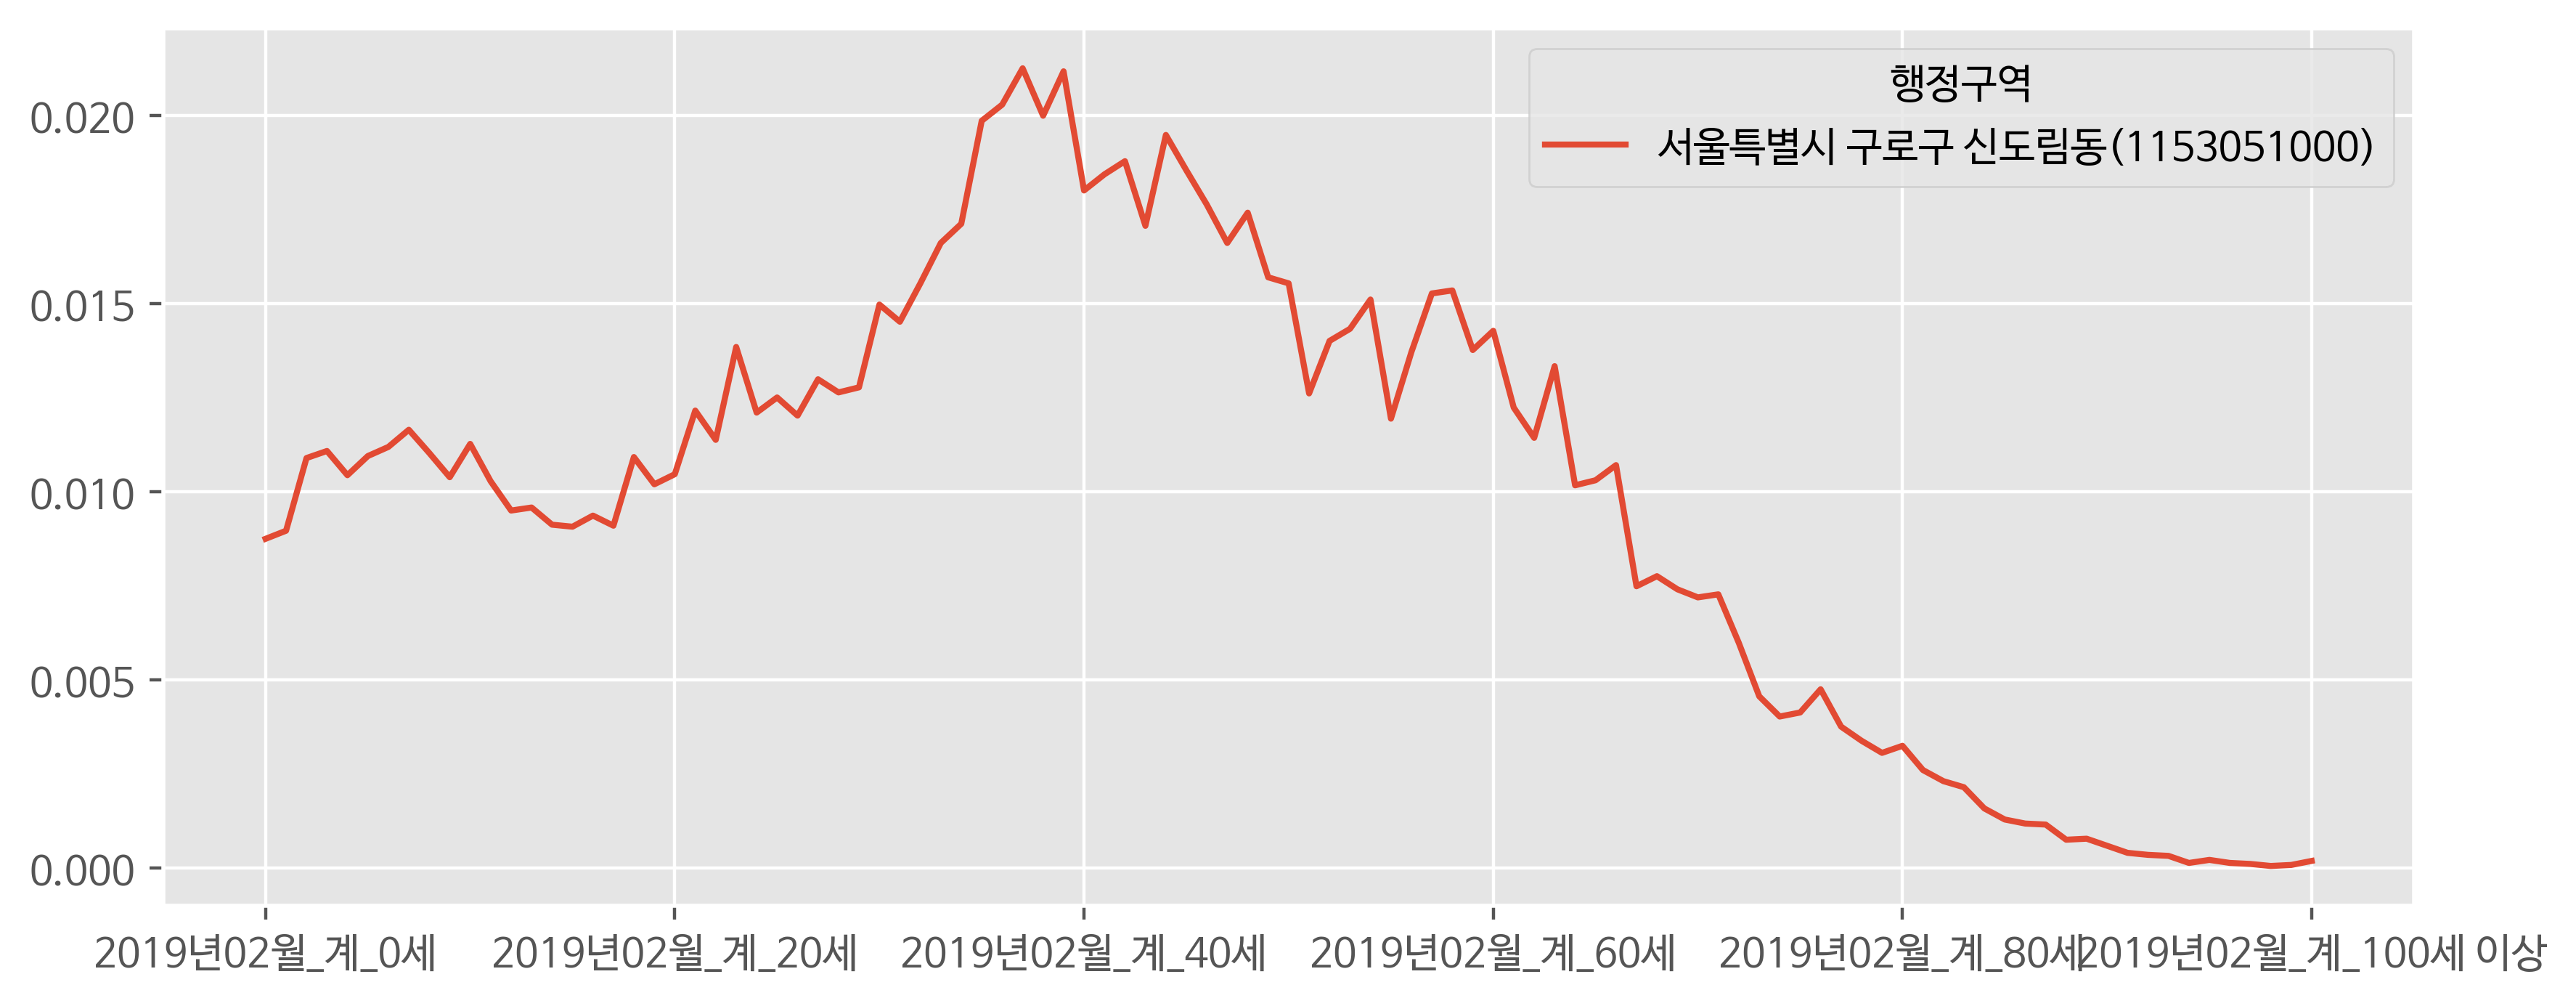

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,4)
plt.rcParams['figure.dpi'] = 200
#plt.figure(figsize=(10,4),dpi=300)
plt.style.use('ggplot')
#plt.rc('font',family = "NanumBarunGothic")
#plt.title(name+' 지역의 인구 구조')
df2.T.plot()
plt.show()

In [ ]:
print(df2)
print(df2.T)

                            2019년02월_계_0세  ...  2019년02월_계_100세 이상
행정구역                                       ...                    
서울특별시 구로구 신도림동(1153051000)       0.008747  ...            0.000188

[1 rows x 101 columns]
행정구역                서울특별시 구로구 신도림동(1153051000)
2019년02월_계_0세                         0.008747
2019년02월_계_1세                         0.008962
2019년02월_계_2세                         0.010894
2019년02월_계_3세                         0.011082
2019년02월_계_4세                         0.010438
...                                        ...
2019년02월_계_96세                        0.000134
2019년02월_계_97세                        0.000107
2019년02월_계_98세                        0.000054
2019년02월_계_99세                        0.000080
2019년02월_계_100세 이상                    0.000188

[101 rows x 1 columns]


In [ ]:
df2

,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,2019년02월_계_38세,2019년02월_계_39세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 구로구 신도림동(1153051000),0.008747,0.008962,0.010894,0.011082,0.010438,0.010948,0.011189,0.011645,0.011028,0.010384,0.01127,0.010277,0.009499,0.009579,0.009123,0.009069,0.009365,0.009096,0.010921,0.010196,0.010465,0.012155,0.011377,0.013846,0.012102,0.012504,0.012021,0.012987,0.012638,0.012772,0.014973,0.014516,0.015536,0.016609,0.017119,0.019856,0.020285,0.021251,0.01999,0.021171,...,0.012236,0.011431,0.013336,0.01017,0.010304,0.010706,0.007486,0.007755,0.007406,0.007191,0.007272,0.005984,0.004562,0.004025,0.004132,0.004749,0.003757,0.003381,0.003059,0.003247,0.002603,0.002308,0.002147,0.001583,0.001288,0.001181,0.001154,0.000751,0.000778,0.00059,0.000402,0.000349,0.000322,0.000134,0.000215,0.000134,0.000107,0.000054,0.00008,0.000188


In [ ]:
df.sub(df2.iloc[0], axis=1) #home - away

,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,2019년02월_계_38세,2019년02월_계_39세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),-0.003248,-0.002862,-0.004158,-0.003843,-0.003270,-0.003886,-0.003372,-0.004098,-0.003287,-0.003201,-0.003674,-0.002061,-0.001846,-0.002258,-0.001106,-0.000620,-0.000964,0.000158,0.000056,0.001016,0.001235,0.000380,0.001877,0.000654,0.003315,0.003489,0.004934,0.003979,0.002998,0.002683,0.000398,0.000273,-0.000767,-0.001742,-0.002520,-0.003724,-0.003405,-0.004041,-0.003324,-0.004589,...,0.002386,0.002115,0.000543,0.002507,0.000273,0.000573,0.001015,0.001009,0.001614,0.001609,0.001531,0.002159,0.001646,0.002466,0.001947,0.002624,0.002484,0.001692,0.001796,0.001097,0.001214,0.001096,0.000894,0.001001,0.000810,0.000636,0.000331,0.000487,0.000320,0.000323,0.000334,0.000201,0.000085,0.000165,0.000073,0.000097,0.000053,0.000067,0.000010,0.000419
서울특별시 종로구 (1111000000),-0.004869,-0.004495,-0.005825,-0.005365,-0.004865,-0.005303,-0.004498,-0.005732,-0.004409,-0.004347,-0.004702,-0.002748,-0.002408,-0.003005,-0.001934,-0.001351,-0.001705,-0.000344,-0.000926,0.001362,0.001957,0.001725,0.002968,0.002206,0.003846,0.004320,0.005522,0.004007,0.003361,0.001840,-0.000543,-0.000381,-0.002061,-0.003861,-0.004770,-0.005799,-0.006445,-0.006737,-0.005580,-0.006931,...,0.002593,0.002986,0.000956,0.003004,0.000587,0.001042,0.001423,0.001318,0.002105,0.002176,0.002618,0.002971,0.002627,0.003923,0.003351,0.004565,0.004387,0.003448,0.003907,0.002601,0.002388,0.002435,0.001948,0.002158,0.001734,0.001403,0.001044,0.001093,0.000766,0.000711,0.000664,0.000515,0.000411,0.000383,0.000237,0.000396,0.000239,0.000208,0.000175,0.001356
서울특별시 종로구 청운효자동(1111051500),-0.003674,-0.002890,-0.005360,-0.003549,-0.002905,-0.003723,-0.002888,-0.003267,-0.002189,-0.003082,-0.001662,0.000638,0.000494,-0.001509,0.001330,0.000462,0.000935,0.002510,0.000993,0.001103,0.002756,-0.001164,0.002535,0.000605,-0.001417,0.000025,0.001123,0.001310,-0.001032,-0.002242,-0.002059,-0.002449,-0.002316,-0.004311,-0.004667,-0.005021,-0.006604,-0.003419,-0.001927,-0.003800,...,-0.000706,-0.000823,-0.001038,-0.000100,-0.000158,-0.001175,-0.000492,0.000162,0.001434,0.000956,0.001875,0.003086,0.002741,0.003892,0.002939,0.004859,0.003469,0.003306,0.004858,0.003133,0.002317,0.002842,0.002619,0.002029,0.002325,0.001202,0.001152,0.000171,0.000836,0.000486,0.000289,0.000266,0.000754,0.000327,0.000323,0.000558,0.000200,0.000100,0.000073,0.001042
서울특별시 종로구 사직동(1111053000),-0.004261,-0.003745,-0.004216,-0.004091,-0.003447,-0.003644,-0.001381,-0.004863,-0.002472,-0.003706,-0.002088,-0.002660,-0.000317,-0.002275,-0.002445,-0.001244,-0.001330,-0.002001,-0.002469,-0.000180,-0.000552,-0.000678,-0.001673,-0.003099,0.001150,0.000017,0.003734,0.001516,0.001656,0.000375,-0.001721,0.003117,0.000115,-0.003671,-0.004598,-0.005457,-0.00494

In [ ]:
print(df)
print(df2)
print(df2.iloc[0])

                              2019년02월_계_0세  ...  2019년02월_계_100세 이상
행정구역                                         ...                    
서울특별시  (1100000000)                0.005500  ...            0.000607
서울특별시 종로구 (1111000000)             0.003879  ...            0.001544
서울특별시 종로구 청운효자동(1111051500)        0.005073  ...            0.001230
서울특별시 종로구 사직동(1111053000)          0.004487  ...            0.001774
서울특별시 종로구 삼청동(1111054000)          0.003191  ...            0.002482
...                                     ...  ...                 ...
제주특별자치도 서귀포시 서홍동(5013058000)       0.007429  ...            0.000190
제주특별자치도 서귀포시 대륜동(5013059000)       0.009253  ...            0.000421
제주특별자치도 서귀포시 대천동(5013060000)       0.008595  ...            0.000147
제주특별자치도 서귀포시 중문동(5013061000)       0.006381  ...            0.000539
제주특별자치도 서귀포시 예래동(5013062000)       0.008483  ...            0.001212

[3841 rows x 101 columns]
                            2019년02월_계_0세  ...  2019년02월_계_100세 이상
행정구역     

In [ ]:
df.sub(df2.iloc[0],axis=1)

,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,2019년02월_계_38세,2019년02월_계_39세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),-0.003248,-0.002862,-0.004158,-0.003843,-0.003270,-0.003886,-0.003372,-0.004098,-0.003287,-0.003201,-0.003674,-0.002061,-0.001846,-0.002258,-0.001106,-0.000620,-0.000964,0.000158,0.000056,0.001016,0.001235,0.000380,0.001877,0.000654,0.003315,0.003489,0.004934,0.003979,0.002998,0.002683,0.000398,0.000273,-0.000767,-0.001742,-0.002520,-0.003724,-0.003405,-0.004041,-0.003324,-0.004589,...,0.002386,0.002115,0.000543,0.002507,0.000273,0.000573,0.001015,0.001009,0.001614,0.001609,0.001531,0.002159,0.001646,0.002466,0.001947,0.002624,0.002484,0.001692,0.001796,0.001097,0.001214,0.001096,0.000894,0.001001,0.000810,0.000636,0.000331,0.000487,0.000320,0.000323,0.000334,0.000201,0.000085,0.000165,0.000073,0.000097,0.000053,0.000067,0.000010,0.000419
서울특별시 종로구 (1111000000),-0.004869,-0.004495,-0.005825,-0.005365,-0.004865,-0.005303,-0.004498,-0.005732,-0.004409,-0.004347,-0.004702,-0.002748,-0.002408,-0.003005,-0.001934,-0.001351,-0.001705,-0.000344,-0.000926,0.001362,0.001957,0.001725,0.002968,0.002206,0.003846,0.004320,0.005522,0.004007,0.003361,0.001840,-0.000543,-0.000381,-0.002061,-0.003861,-0.004770,-0.005799,-0.006445,-0.006737,-0.005580,-0.006931,...,0.002593,0.002986,0.000956,0.003004,0.000587,0.001042,0.001423,0.001318,0.002105,0.002176,0.002618,0.002971,0.002627,0.003923,0.003351,0.004565,0.004387,0.003448,0.003907,0.002601,0.002388,0.002435,0.001948,0.002158,0.001734,0.001403,0.001044,0.001093,0.000766,0.000711,0.000664,0.000515,0.000411,0.000383,0.000237,0.000396,0.000239,0.000208,0.000175,0.001356
서울특별시 종로구 청운효자동(1111051500),-0.003674,-0.002890,-0.005360,-0.003549,-0.002905,-0.003723,-0.002888,-0.003267,-0.002189,-0.003082,-0.001662,0.000638,0.000494,-0.001509,0.001330,0.000462,0.000935,0.002510,0.000993,0.001103,0.002756,-0.001164,0.002535,0.000605,-0.001417,0.000025,0.001123,0.001310,-0.001032,-0.002242,-0.002059,-0.002449,-0.002316,-0.004311,-0.004667,-0.005021,-0.006604,-0.003419,-0.001927,-0.003800,...,-0.000706,-0.000823,-0.001038,-0.000100,-0.000158,-0.001175,-0.000492,0.000162,0.001434,0.000956,0.001875,0.003086,0.002741,0.003892,0.002939,0.004859,0.003469,0.003306,0.004858,0.003133,0.002317,0.002842,0.002619,0.002029,0.002325,0.001202,0.001152,0.000171,0.000836,0.000486,0.000289,0.000266,0.000754,0.000327,0.000323,0.000558,0.000200,0.000100,0.000073,0.001042
서울특별시 종로구 사직동(1111053000),-0.004261,-0.003745,-0.004216,-0.004091,-0.003447,-0.003644,-0.001381,-0.004863,-0.002472,-0.003706,-0.002088,-0.002660,-0.000317,-0.002275,-0.002445,-0.001244,-0.001330,-0.002001,-0.002469,-0.000180,-0.000552,-0.000678,-0.001673,-0.003099,0.001150,0.000017,0.003734,0.001516,0.001656,0.000375,-0.001721,0.003117,0.000115,-0.003671,-0.004598,-0.005457,-0.00494

In [ ]:
np.power(df.sub(df2.iloc[0],axis=1),2).sum(axis=1).sort_values()

행정구역
서울특별시 구로구 신도림동(1153051000)        0.000000
서울특별시 구로구 구로제1동(1153052000)       0.000093
경기도 하남시 (4145000000)              0.000106
충청북도 청주시 청원구 (4311400000)         0.000128
경상북도 포항시 남구 오천읍(4711125600)       0.000131
                                    ...   
경상북도 의성군 신평면(4773045000)          0.016233
경기도 파주시 진동면(4148040000)           0.016455
인천광역시 강화군 서도면볼음출장소(2871042500)    0.017248
전라남도 고흥군 도양읍소록출장소(4677025400)     0.023897
강원도 철원군 근북면(4278033000)           0.026871
Length: 3841, dtype: float64

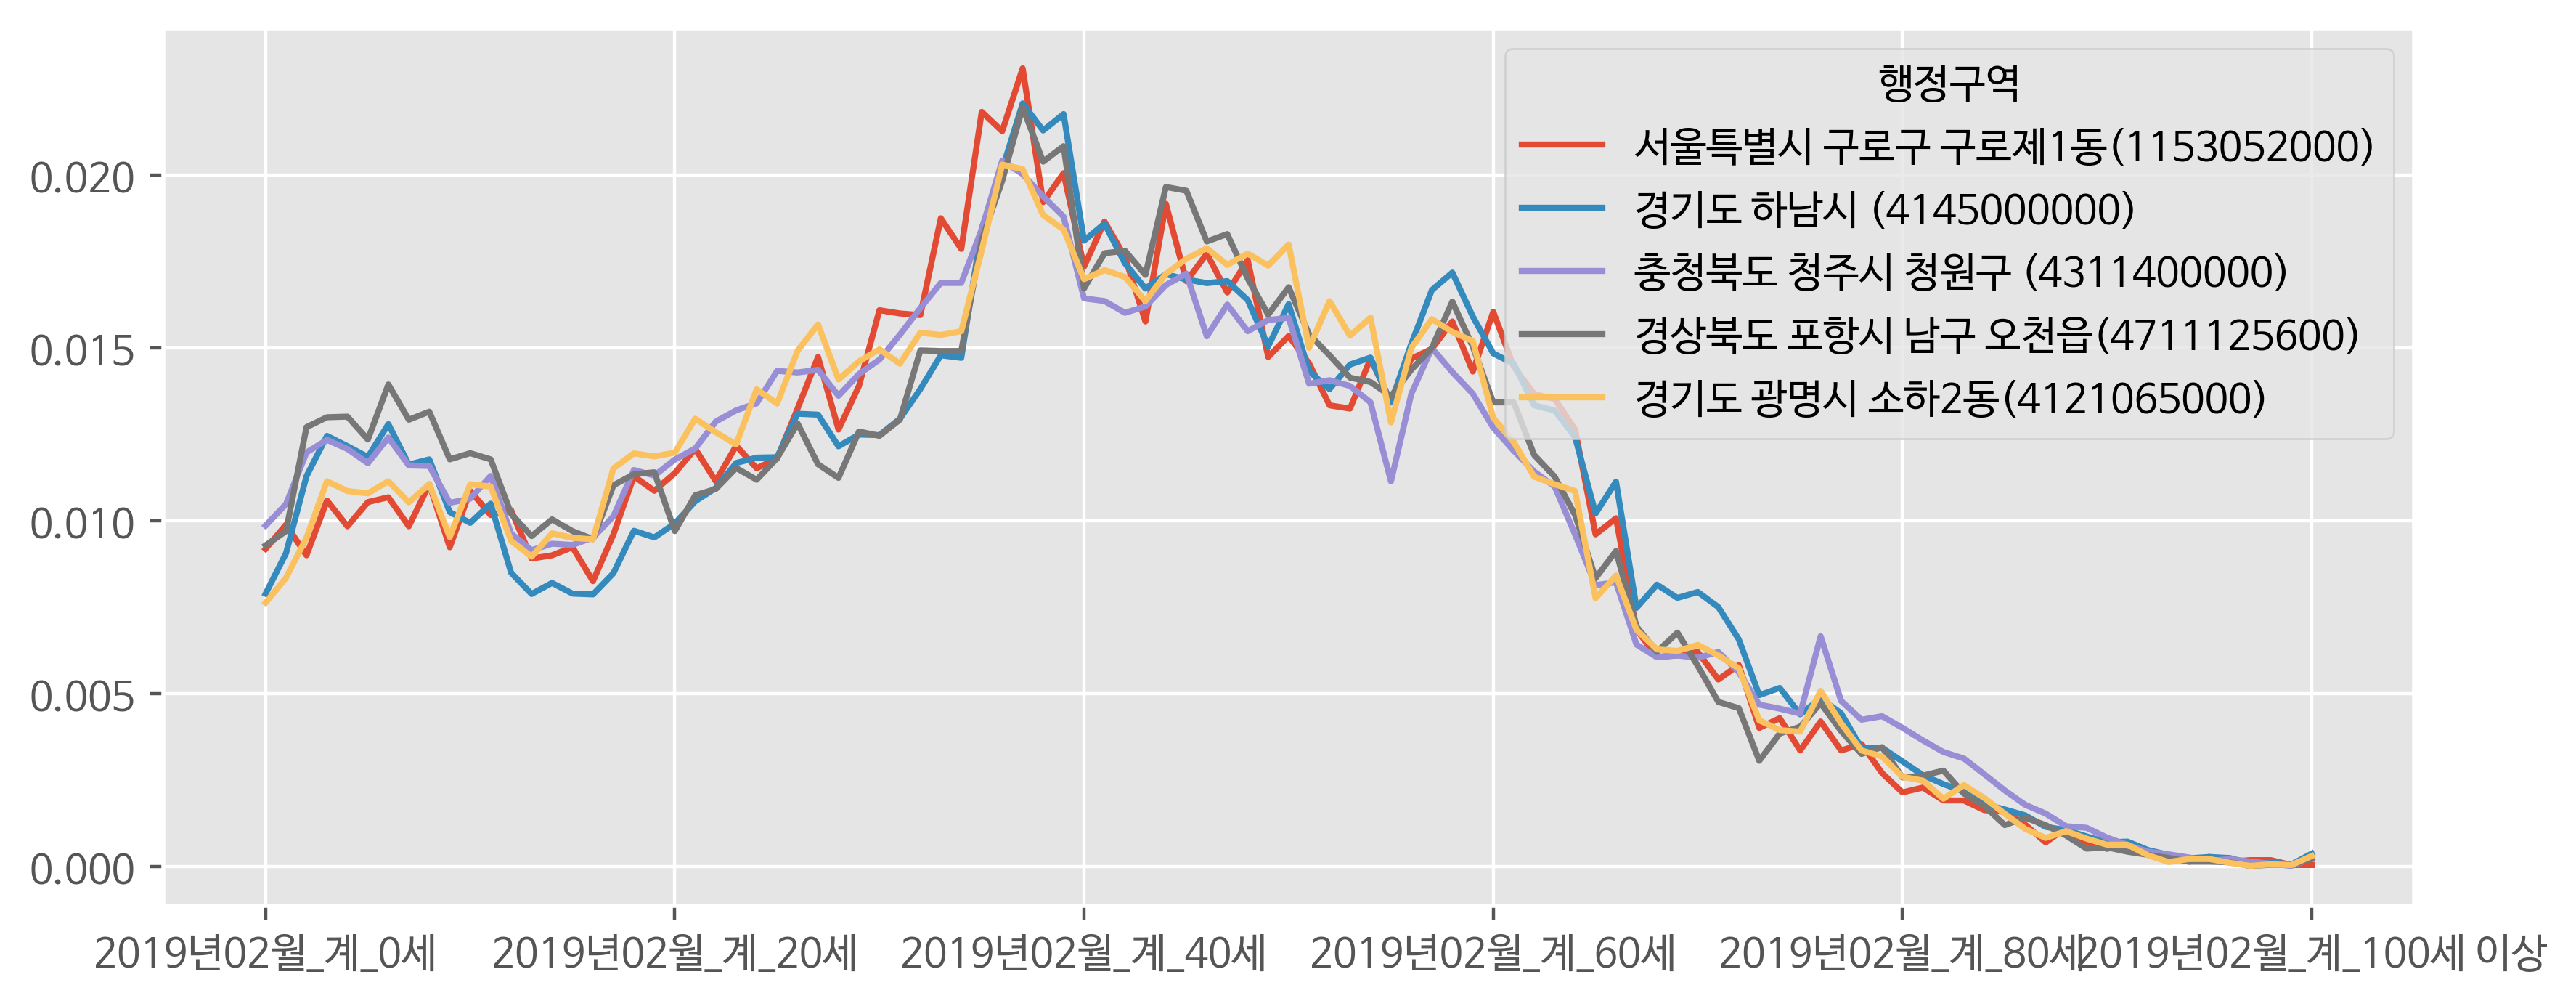

In [ ]:
import numpy as np

df.loc[np.power(df.sub(df2.iloc[0], axis=1),2).sum(axis=1).sort_values().index[1:6]].T.plot()
plt.show()

###최종

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요: 신림동


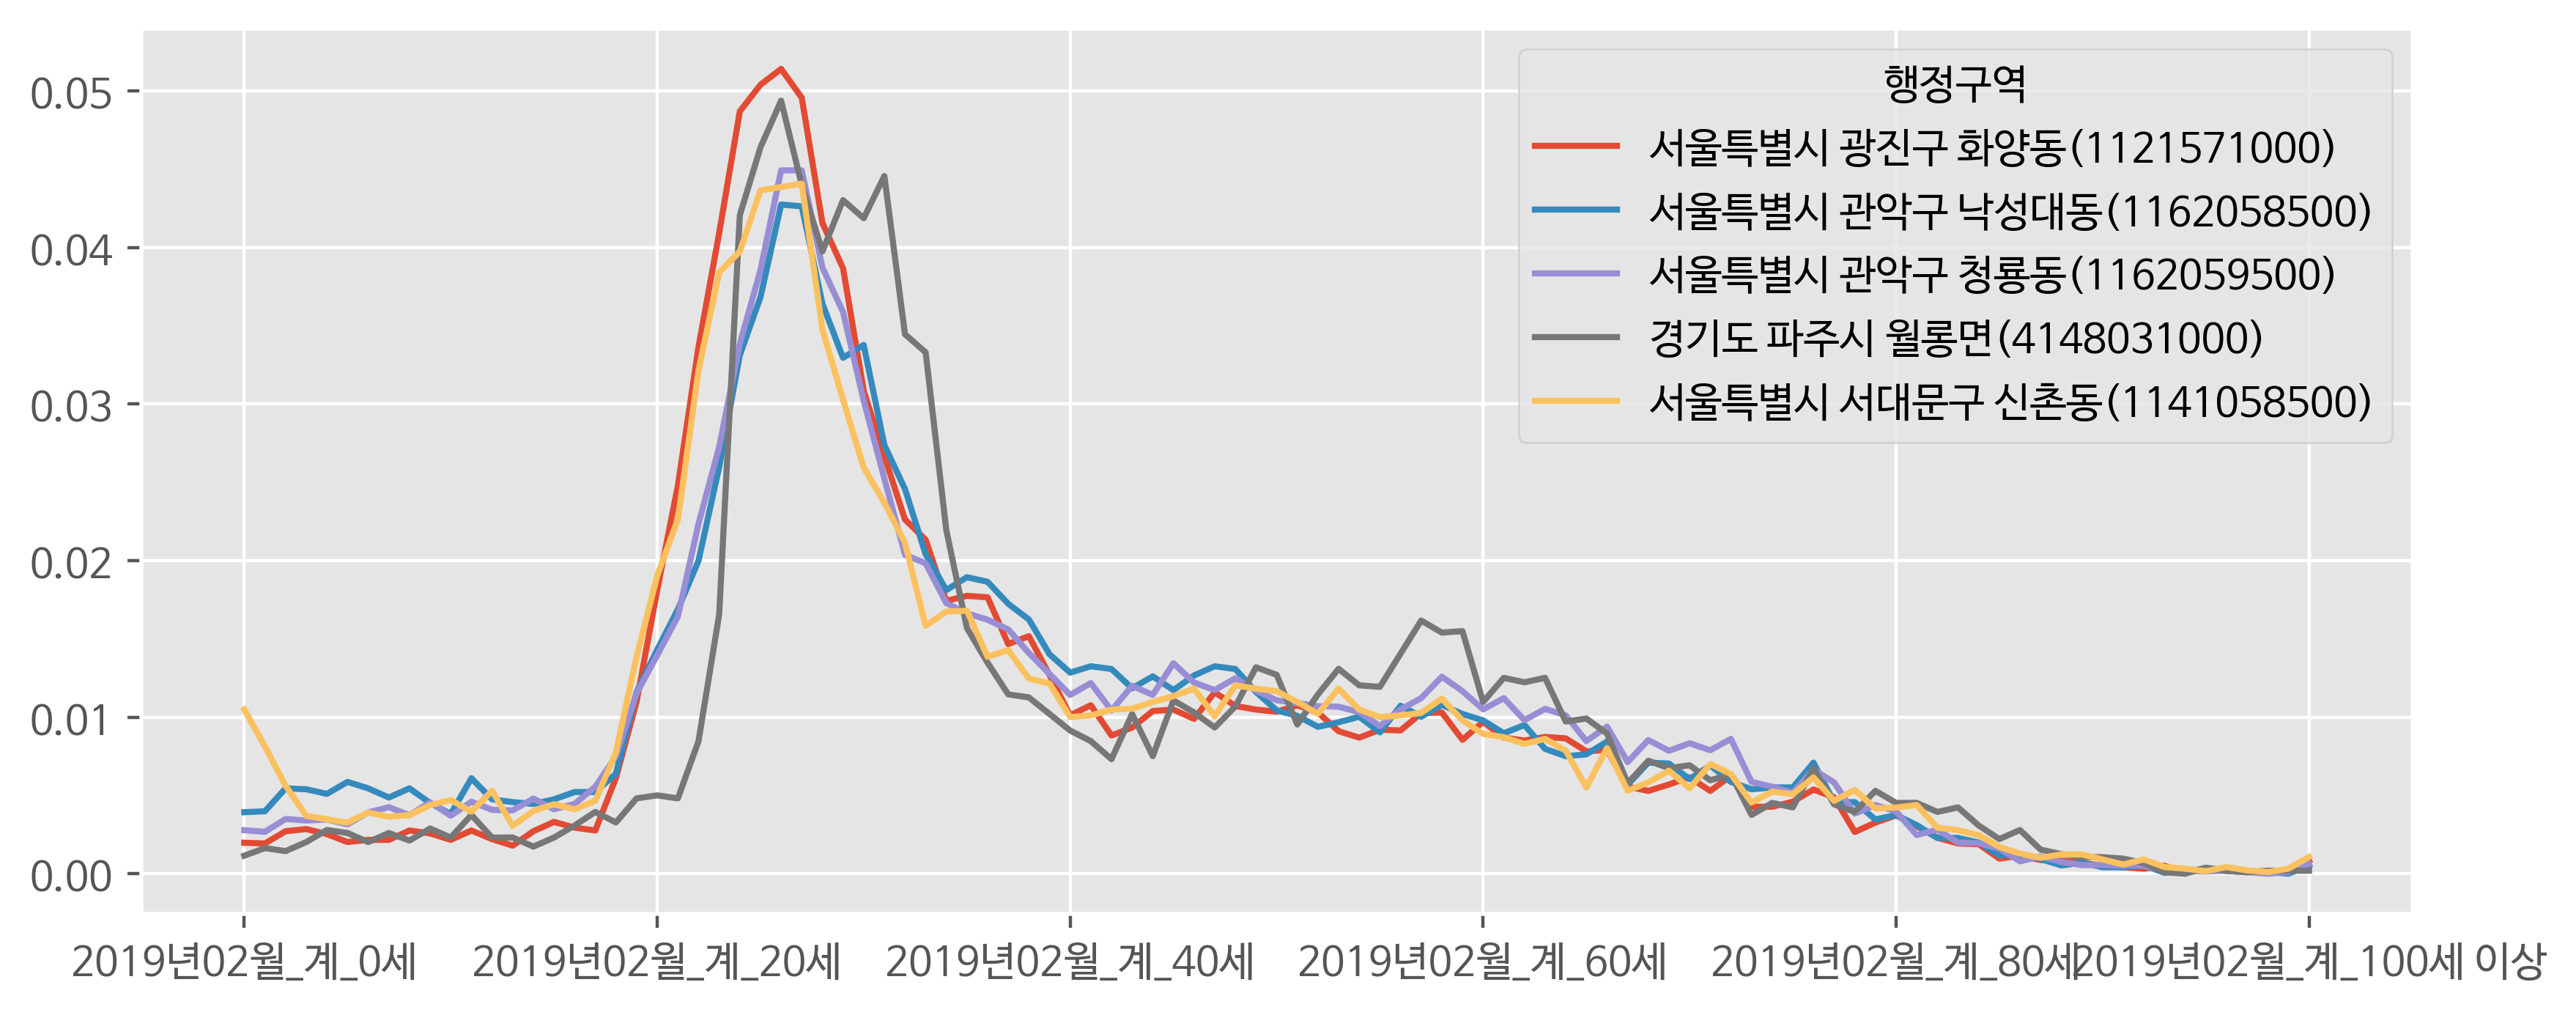

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('age.csv',encoding='cp949',index_col = 0)

df = df.div(df['총인구수'],axis=0)

del df['총인구수'], df['연령구간인구수']

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요: ')

a = df.index.str.contains(name) # 3. 해당 행의 인덱스를 찾아서 인구 구조를 저장

df2 = df[a]
df.loc[np.power(df.sub(df2.iloc[0], axis=1),2).sum(axis=1).sort_values().index[1:6]].T.plot()
plt.show()

In [ ]:
help(frozenset)

Help on class frozenset in module builtins:

class frozenset(object)
 |  frozenset() -> empty frozenset object
 |  frozenset(iterable) -> frozenset object
 |  
 |  Build an immutable unordered collection of unique elements.
 |  
 |  Methods defined here:
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __contains__(...)
 |      x.__contains__(y) <==> y in x.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __len__(self, /)
 |      Return len(self).
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __or__(self,